# Проект: Анализ данных по сотрудникам
Предоставлен csv датасет с данными о сотрудниках.

**Цель:** Провести поверхностную аналитику данных по сотрудникам 

**Задача:** 
 - дать оценку качеству полученных данных
 - очистить данные от аномалий и получить чистые от них данные
 - анализ очищенных данных 

Все библиотеки, необходимые для работы - в начале проекта.

In [1]:
# установим phik
!pip install phik

In [2]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
import phik
from phik import phik_matrix

In [3]:
# Импортируем библиотеки
import pandas as pd

In [4]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

# Математика
import numpy as np

np.set_printoptions(precision=4)
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)
# игнорируем предупреждения
pd.set_option('chained_assignment', None)
# скроем предупреждения системные
import warnings
warnings.filterwarnings("ignore")  


## Загрузка и знакомство с данными

Выгружаем данные датасета в датафрейм `df`.  Датасет хранится локально.

In [5]:
# Выгружаем данные в переменную `df` путь на локальном пк
# файл dataset_homework.csv
df = (pd.read_csv
(r'C:\Users\79181\notebook_notebook\aston\datasets_aston\dataset_homework.csv')
     )

Сделаем копию датафрейма, в которой сохраним сырые данные до обработки, чтобы иметь возможность сравнить версии в дальнейшем

In [6]:
# копируем датафрейм
df_raw = df.copy(deep=True)

In [7]:
#смотрим на загруженный датафрейм
df.sample(n=5, random_state=1)

,first_name,last_name,age,email,salary,join_date
507,Aaron,Wilson,51,noah@example.com,48294,2022-13-01
818,Ulysses,Rivera,34,nate@example.com,86388,2021-06-01 00:00:00
452,Olivia,Davis,37,daniel@example.com,97962,2021-12-30 00:00:00
368,Ulysses,Baker,25,alice@example.com,35586,2023-04-23 00:00:00
242,Victor,Johnson,33,gina@example.com,90865,2022-13-01


In [8]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  1000 non-null   object
 1   last_name   1000 non-null   object
 2   age         978 non-null    object
 3   email       999 non-null    object
 4   salary      988 non-null    object
 5   join_date   1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


Датасет dataset_homework.csv содержит 6 столбцов и 1000 строк, в которых представлена информация о людях, возрасте, эл.почте уровне зарплаты, дате присоединения.

### Типы данных и их корректность
Изучим типы данных в столбцах и их корректность:

In [9]:
#названия полей
df.columns

Index(['first_name', 'last_name', 'age', 'email', 'salary', 'join_date'], dtype='object')

Все поля `'first_name', 'last_name', 'age', 'email', 'salary', 'join_date'` имеют тип данных `object`:
 - `'first_name', 'last_name',  'email'`,  содержат строковую информацию (имя, фамилию, електронный адрес), что логично для текстовых данных. Здесь тип данных object подходит.
 - `'age'` содержит целочисленную информацию - возраст, хранимую в object. Необходимо преобразовать из типа object в целочисленный тип. Учесть, что  по полю есть пропуски (978 строк из 1000 non-null).
 - `'salary'` - содержит информацию о заработке, хранимую в object. Информация о деньгах хранится обычно в вещественном типе данных. Необходимо преобразовать из типа object в вещественный тип данных.
 - `'join_date'` хранит информацию о дате и времени, хранимую в object. Для таких данных рекомендуется использовать тип datetime64, который облегчит выполнение временных вычислений и упростит анализ временных периодов.

На первый взгляд. пропусков мало и они есть в столбцах 'age', 'email', 'salary'. Однако в данных могут быть заглушки - инфорация, которую можно приравнять к пропускам. 

Прежде чем смотреть на пропуски и менять типы данных, посмотрим на уникальные значения, которые есть в столбцах и убедимся, что информации-заглушек нет в датафрейме, а если есть, то принять решение о том, что с ними делать.


### Уникальные значения столбцов

Посмотрим, какие уникальные значения хранят столбцы. Данных не очень много и мы можем буквально посмотреть их все. Для удобства выводы. объявим переменную, в которую запишем названия столбцов - используем ее в цикле.

In [10]:
col_name= ['first_name', 'last_name', 'age', 'email', 'salary', 'join_date']

In [11]:
for i, column in enumerate(['first_name', 'last_name', 
              'age', 'email', 'salary', 'join_date']):
    print(f"Уникальных значений в столбце \
{col_name[i]}: {df[column].nunique()}\n\
=========================================================\n\
{df[column].unique()}\n\
=========================================================")

Уникальных значений в столбце first_name: 52
['Quincy' 'Xena' 'Leo' 'Jack' 'Charlie' 'Steve' 'Uma' 'Catherine' 'Tara'
 'Beatrice' 'Eve' 'Wendy' 'Kevin' 'Paul' 'Mia' 'Isaac' 'Ulysses' 'David'
 'Bob' 'Ella' 'Ivy' 'Alice' 'Liam' 'Rachel' 'Walter' 'Hannah' 'Xander'
 'Quinn' 'Zoe' 'Frank' 'Maya' 'Henry' 'Felix' 'Nate' 'Victor' 'Vera'
 'Daniel' 'Aaron' 'Noah' 'Kira' 'Tina' 'Olivia' 'Samuel' 'Julia' 'Yara'
 'Piper' 'Yasmine' 'Gina' 'Rosa' 'Owen' 'Grace' '11']
Уникальных значений в столбце last_name: 42
['White' 'Rodriguez' 'Smith' 'Allen' 'Taylor' 'Miller' 'Walker' 'Clark'
 'King' 'Wright' 'Hall' 'Thomas' 'Torres' 'Martin' 'Williams' 'Garcia'
 'Flores' 'Baker' 'Hill' 'Green' 'Scott' 'Nguyen' 'Adams' 'Martinez'
 'Jones' 'Mitchell' 'Rivera' 'Davis' 'Campbell' 'Thompson' 'Johnson'
 'Wilson' 'Moore' 'Lee' 'Brown' 'Harris' 'Jackson' 'Robinson' 'Anderson'
 'Young' 'Lewis' 'Nelson']
Уникальных значений в столбце age: 50
['33' '28' '56' '38' '55' 'unknown' '19' '37' '50' '43' '40' '21' '51'
 '24' '27

Почти все столбцы преподнесли сюрпризы. Помимо заглушек, есть аномальные значения, значения с минусом.


Столбцы, к которым никаких вопросов не возникло : last_name.

По столбцу с информацией о дате - есть даты без timestamp - при этом данные о времени не несут какой-то информации. При преобразовании стоит ограничиться тоько датой без времени.

Рассмотрим каждый столбец подробнее.

#### Поле 'first_name' 
- 'first_name' - Среди уникальных значений имен содержится имя "11".

Посмотрим, сколько строк со значением "11" в поле 'first_name'   

In [12]:
print(f"Всего строк с аномалией: \
{df.query("first_name == '11'").shape[0]}, это \
{round((df.query("first_name == '11'")\
.shape[0] / len(df) *100), 4)} %  от всех данных")

Всего строк с аномалией: 1, это 0.1 %  от всех данных


Кандидат на удаление - одна строка. Посмотрим на нее

In [13]:
df.query("first_name == '11'")

,first_name,last_name,age,email,salary,join_date
658,11,Martin,18,bob@example.com,118873,2021-02-06 00:00:00


Все остальные поля заполнены и вот такое значение в имени выглядит случайной ошибкой, более того, емейл заполнен именем. Кажется, что можно восстановить данные без больших временных затрат. Однако количество уникальных емейл на 1000 строк вызывает подозрение, что эта гипотеза может быть несостоятельна. Посмотрим, какие емейл у всех людей с именем Bob

In [14]:
df.query("first_name == 'Bob'")

,first_name,last_name,age,email,salary,join_date
27,Bob,Baker,43,xena@example.com,76864,2021-04-26 00:00:00
33,Bob,Adams,33,quinn@example.com,113345,2022-05-10 00:00:00
47,Bob,Flores,56,catherine@example.com,79548,2020-07-15 00:00:00
56,Bob,Johnson,NaN,bob@example.com,117438,2022-03-25 00:00:00
114,Bob,Hall,23,yara@example.com,48241,2022-03-02 00:00:00
120,Bob,Wilson,45,tina@example.com,9999999,2022-06-20 00:00:00
198,Bob,Jones,31,zoe@example.com,44117,2021-10-25 00:00:00
208,Bob,Davis,63,grace@example.com,69619,2021-11-17 00:00:00
263,Bob,Clark,45,quinn@example.com,78832,2023-07-04 00:00:00
290,Bob,Flores,34,grace@example.com,9999999,2022-11-07 00:00:00


Увы, восстановить имя только лишь на основании названия емейл не удастся. Среди полученных строк видим, что есть также проблемы в полях с емейлом "invalid_email" и размером заработной платы "9999999". Учтем это в последствии, когда будем рассматривать эти поля.

Так как целью является получение очищенных цельных по всем полям данных, то удалим эту строку.

In [15]:
# удалим в поле строки с аномалиями
df.drop(df[df.first_name == '11'].index, inplace=True)

In [16]:
print(f"До удаления строки уникальных значений \
в столбце {col_name[0]}: {df_raw.first_name.nunique()} шт.")
print(f"После удаления строки уникальных значений \
в столбце {col_name[0]}: {df.first_name.nunique()}шт. Это:")
print(list(sorted(df.first_name.unique())))

До удаления строки уникальных значений в столбце first_name: 52 шт.
После удаления строки уникальных значений в столбце first_name: 51шт. Это:
['Aaron', 'Alice', 'Beatrice', 'Bob', 'Catherine', 'Charlie', 'Daniel', 'David', 'Ella', 'Eve', 'Felix', 'Frank', 'Gina', 'Grace', 'Hannah', 'Henry', 'Isaac', 'Ivy', 'Jack', 'Julia', 'Kevin', 'Kira', 'Leo', 'Liam', 'Maya', 'Mia', 'Nate', 'Noah', 'Olivia', 'Owen', 'Paul', 'Piper', 'Quincy', 'Quinn', 'Rachel', 'Rosa', 'Samuel', 'Steve', 'Tara', 'Tina', 'Ulysses', 'Uma', 'Vera', 'Victor', 'Walter', 'Wendy', 'Xander', 'Xena', 'Yara', 'Yasmine', 'Zoe']


По неопределенному значению "11" столбца `first_name` удалили строку из датарейма.

Посмотрим теперь на столбец `age`

#### Поле `age`
-  `age` - возраст
Помимо пропусков тут есть значения с минусом и аномально высокие значения.

Посмотрим на отсортированные значения поля age.

Для сокращения вывода оставим только по 5 строк сверху и снизу. Так вышло, что в эти границы уложились уникальные значения и их количество, предварительно отсортированные по убыванию в лексикографическом выражении (помним, что тип данных по этому полю пока object).

In [17]:
#  первые 5 строк с уникальными значениями age и их количеством
display(df['age']
 .value_counts(dropna=False)
 .reset_index()
 .sort_values(by='age', ascending=False).head(5))

#  последние 5 строк с уникальными значениями age и их количеством
(
df['age']
 .value_counts(dropna=False)
 .reset_index()
 .sort_values(by='age', ascending=False).tail(5)
)

,age,count
2,unknown,29
50,999,1
18,64,21
3,63,27
19,62,21


,age,count
42,20,15
21,19,21
33,18,19
49,-10,1
14,NaN,22


По полю age  можно сказать:
 - unknown  - встречается 29 упоминаний . Их можно приравнять к пропускам.
 - "-10" и "999" - эти значения возраста аномальны. Каждое встречается по  1 разу, т.е. всего 2 строки. Данные ошибочно внесенные и для нашей цели мы можем приравнять их к пропуску, так как возможности заменить на что-то иное нет - это исказит исследования. Данные ключевые.
 - NaN  - не заполнено 22 строки.

Дополнительно можно сказать, что минимальное значение возраста 18, а максимальное 64. что вполне вписывается в возраст трудоспособного населения.

Посмотрим на строки с аномалиями и пропусками по полю age.

In [18]:
(
df[(df['age'] == '-10') | 
   (df['age'] == '999') | 
   (df['age'] == 'unknown') | 
   (df['age'].isnull())]
   .sort_values(by='age') 
)

,first_name,last_name,age,email,salary,join_date
519,Hannah,Lee,-10,felix@example.com,100212,2022-10-03 00:00:00
615,Maya,Hall,999,isaac@example.com,77908,2023-08-24 00:00:00
6,Steve,Walker,unknown,olivia@example.com,78191,2021-11-10 00:00:00
860,Maya,Miller,unknown,zoe@example.com,60445,2022-10-28 00:00:00
841,Paul,Flores,unknown,invalid_email,108331,2021-07-20 00:00:00
752,Quincy,Smith,unknown,quincy@example.com,112002,2023-04-21 00:00:00
746,Tina,Martin,unknown,ella@example.com,72607,2022-07-16 00:00:00
742,Uma,Davis,unknown,tina@example.com,38042,2020-08-27 00:00:00
737,Charlie,Johnson,unknown,liam@example.com,100649,2020-11-11 00:00:00
698,Leo,Torres,unknown,quinn@example.com,107256,2020-04-07 00:00:00


In [19]:
# % пропусков и аномалий
print("Строк с аномальными данными и пропусками:",
(len(df[(df['age'] == '-10') | (df['age'] == '999') 
| (df['age'] == 'unknown') | 
(df['age'].isnull())])), end = ': ')

# % пропусков и аномалий
print("Это", 
100 * (len(df[(df['age'] == '-10') | (df['age'] == '999') 
| (df['age'] == 'unknown') | 
(df['age'].isnull())])) / 
(len(df_raw)), "% от всех данных.")

Строк с аномальными данными и пропусками: 53: Это 5.3 % от всех данных.


Пропусков и данных, которые к ним можно приравнять (аномалии и заглушки) - 5%. Это достаточно много. Однако эти данные не помогут в исследовании. Поэтому удалим их.

In [20]:
# удалим в поле строки с аномалиями
df.drop(df[(df['age'] == '-10') | (df['age'] == '999') 
| (df['age'] == 'unknown') | 
(df['age'].isnull())].index, inplace=True)

In [21]:
# посчитаем уник.значения до удаления аномалий и пропусков
print(f"В сырых данных уникальных значений \
в столбце {col_name[2]}: {df_raw.age.nunique()} шт.")

# посчитаем уник.значения после удаления аномалий и пропусков
print(f"После манипуляций уникальных значений \
в столбце {col_name[2]}: {df.age.nunique()} шт. \
Разница {df_raw.age.nunique() - df.age.nunique()}\
 шт.\nОстались значения:")
print(list(sorted(df.age.unique())))

В сырых данных уникальных значений в столбце age: 50 шт.
После манипуляций уникальных значений в столбце age: 47 шт. Разница 3 шт.
Остались значения:
['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64']


#### Поле `email`
-  `email` - адрес электронной почты.
-  
Посмотрим на отсортированные значения поля age. выше удалено было чуть более 5% от данных. Посмотрим, какие аномалии остались по столбцу с емейл.

Посчитаем все уникальные значения в этом поле и посмотрим на них. Данных не много, поэтому в данном случае, без дополнительных инструментов можно просто визуально оценить данные.

In [22]:
(
df['email']
 .value_counts(dropna=False)
 .reset_index()
 .sort_values(by='count', ascending=True)
)

,email,count
54,kevin,1
53,charlie@example,1
52,NaN,1
51,ivy@example.com,9
50,henry@example.com,10
49,kira@example.com,11
48,ella@example.com,11
47,kevin@example.com,13
46,tara@example.com,13
45,david@example.com,13


По полю email  можно сказать:
 - charlie@example	 - встречается 1 упоминание . Его можно восстановить, ведь не хватет только .com в адресе
 - kevin - встречается только  1 раз. Это значение можно восстановить, ведь не хватет только @example.com в адресе. Все адреса с таким доменом. Скорее всего это адрес корпоративной почты и он един для всех. Если бы доменов было больше, то так однозначно восстановить адрес электронной почты было бы нельзя.
 - invalid_email - встречается 48 раз. Это сравнимо с пропусками - восстановить никак нельзя. Только удалять.
  - NaN  - не заполнено 1 строка.

Заменим ошибочные значения в поле email и удалим пропуски и invalid_email, которые можно приравнять к пропускам

In [23]:
#заменим kevin и charlie@example
(df['email'].replace(
    {'kevin':'kevin@example.com',
    'charlie@example': 'charlie@example.com'}, 
   inplace=True)
)


In [24]:
# удалим в поле строки с пропусками и значением invalid_email
(df.drop(df[(df['email'] == 'invalid_email') 
         | (df['email'].isnull())]
         .index, inplace=True)
)

In [25]:
# посчитаем уник.значения до удаления аномалий и пропусков
print(f"В сырых данных уникальных значений \
в столбце {col_name[3]}: {df_raw.email.nunique()} шт.")

# посчитаем уник.значения после удаления аномалий и пропусков
print(f"После всех манипуляций уникальных значений \
в столбце {col_name[2]}: {df.email.nunique()} шт. \
Разница {df_raw.email.nunique() - df.email.nunique()}\
 шт.\nОстались значения:")
sorted(df.email.unique())

В сырых данных уникальных значений в столбце email: 54 шт.
После всех манипуляций уникальных значений в столбце age: 51 шт. Разница 3 шт.
Остались значения:


['aaron@example.com',
 'alice@example.com',
 'beatrice@example.com',
 'bob@example.com',
 'catherine@example.com',
 'charlie@example.com',
 'daniel@example.com',
 'david@example.com',
 'ella@example.com',
 'eve@example.com',
 'felix@example.com',
 'frank@example.com',
 'gina@example.com',
 'grace@example.com',
 'hannah@example.com',
 'henry@example.com',
 'isaac@example.com',
 'ivy@example.com',
 'jack@example.com',
 'julia@example.com',
 'kevin@example.com',
 'kira@example.com',
 'leo@example.com',
 'liam@example.com',
 'maya@example.com',
 'mia@example.com',
 'nate@example.com',
 'noah@example.com',
 'olivia@example.com',
 'owen@example.com',
 'paul@example.com',
 'piper@example.com',
 'quincy@example.com',
 'quinn@example.com',
 'rachel@example.com',
 'rosa@example.com',
 'samuel@example.com',
 'steve@example.com',
 'tara@example.com',
 'tina@example.com',
 'ulysses@example.com',
 'uma@example.com',
 'vera@example.com',
 'victor@example.com',
 'walter@example.com',
 'wendy@example.c

#### Поле `salary`
-  `salary` - размер заработной платы

Посмотрим на отсортированные значения поля salary. Выше удалено было чуть более 10% от данных. Посмотрим, какие аномалии остались по столбцу с заработной платой после удалений такого большого количества строк..

Посчитаем все уникальные значения в этом поле и посмотрим на них. Данных много, поэтому в данном случае, отсортируем по убыванию. У нас строки, поэтому все строки в которых буквы - будут сверху., а все строки, в которых цифры с аномалиями - будут снизу вывода данных. 

In [26]:
(
df['salary']
 .value_counts(dropna=False)
 .reset_index()
 .sort_values(by='salary', ascending=False)
)

,salary,count
0,not_available,18
1,9999999,13
492,99732,1
817,99516,1
5,99234,2
...,...,...
313,100350,1
703,100294,1
425,100196,1
807,-82085,1


In [27]:
# % пропусков и аномалий
print("Строк с аномальными данными и пропусками:",
(len(df[(df['salary'] == '9999999') 
| (df['salary'] == 'not_available') 
| (df['age'].isnull())])), end = ' ')

# % пропусков и аномалий
print("\nЭто", 
100 * (len(df[(df['salary'] == '9999999') 
| (df['salary'] == 'not_available') 
| (df['age'].isnull())])) / 
(len(df_raw)), "% от всех данных.", end='\n')

Строк с аномальными данными и пропусками: 31 
Это 3.1 % от всех данных.


По полю salary  можно сказать:
 - "not_available"	 встречается 18 раз. Это сравнимо с пропусками - восстановить никак нельзя. Только удалять.
 -"9999999" - встречается 13 раз. Это значение аномально. Почти 10 миллионов. В 100 раз больше любого другого значения. Данные были ошибочно введены. можно предположить, что зарабоиная плата у этих сотрудников 99 999, однако это может быть и 999 999. Лично приходилось работать с данными, где оклад был на таком уровне. Поэтому без дополнительных данных и уточнений эти данные требуют удаления.
 - "-82085" - отрицательный размер зарабоной платы - скорее всего минус появился ошибочно, заменим на 82082
 - NaN  - не заполнено 12 строк - удалим. Информация ключевая. Только удалять.

Пропусков и приравненных к ним заглушек, а также аномалий более 3%. Это много, однако оставлять эту информацию нельзя.

Заменим -82082 на 82000.

Удалим ошибочные значения в поле salary:9999999; удалим пропуски и not_available, которые можно приравнять к пропускам.

Остальные аномалии в зп поищем после того, как преобразуем тип данных. Возможно какие-то отрицательные значения или другие аномалии были пропущены. Главное убрать пропуски и информацию. которая по факту не является численной (заглушки).

In [28]:
#заменим -82085 на 82085
(df['salary'].replace({'-82085':'82085'}, 
    inplace=True)
)

In [29]:
# удалим в поле строки с аномалиями
(
df.drop(df[(df['salary'] == '9999999') | (df['salary'] == 'not_available') 
| (df['salary'] == 'not_available') | (df['salary'].isnull())].index, inplace=True)
)

In [30]:
# посчитаем уник.значения до удаления аномалий и пропусков
print(f"В сырых данных уникальных значений \
в столбце {col_name[4]}: {df_raw.salary.nunique()} шт.")

# посчитаем уник.значения после удаления аномалий и пропусков
print(f"После всех манипуляций строк уникальных значений \
в столбце {col_name[4]}: {df.salary.nunique()} шт. \
Разница {df_raw.salary.nunique() - df.salary.nunique()}\
 шт.")


В сырых данных уникальных значений в столбце salary: 947 шт.
После всех манипуляций строк уникальных значений в столбце salary: 846 шт. Разница 101 шт.


Видны разница между уникальными значениями до того как мы начали удалять даные по разным полям. 947 уникальных значений было изначально, 849 строк осталось до начала  удаления по предыдущему шагу. Всего потеряно 101 уникальное значение. Метрика сама по себе нет так показательна, как подсчет потерянных строк - их по идее может быть больше. Посчитаем петри строк, когда подведем итоги.

Значения на аномалии по этому полю (максимальные - минимальные) проверим после преобразования типов данных.

Посмотрим на количество строк с пропусками.

In [31]:
print(f"Всего датасет содержит {df.isnull().values.sum()} пропусков.\n\
=========================================")
print('Пропусков в каждом из столбцов:\n\
=========================================')
print(df.isna().sum(),'\n\
=========================================')
print('Процент пропусков в каждом из столбцов:\n\
=========================================')
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (pct_missing*100).round(1)))


Всего датасет содержит 0 пропусков.
Пропусков в каждом из столбцов:
first_name    0
last_name     0
age           0
email         0
salary        0
join_date     0
dtype: int64 
Процент пропусков в каждом из столбцов:
first_name - 0.0%
last_name - 0.0%
age - 0.0%
email - 0.0%
salary - 0.0%
join_date - 0.0%


Пропусков не осталось. Подсчитаем потери данных в результате удаления пропусков и аномалий.


In [32]:
#
print(f"Всего {df_raw.shape[0]} строк с сырыми данными.\n\
=========================================")
print('Удалили: ', df_raw.shape[0] - df.shape[0], 'строк',
'это', round((1 - df.shape[0]/ df_raw.shape[0] )*100, 2), "%\
от всех данных")    

print('Осталось', (df_raw.shape[0] - 
(df_raw.shape[0] - df.shape[0])), 'строки для анализа.')


Всего 1000 строк с сырыми данными.
Удалили:  146 строк это 14.6 %от всех данных
Осталось 854 строки для анализа.


Данных, которыесодержали пропуски, заглушки, котооые можно приравнять к пропускам 14,6%. Они удалены. Это ольшой объем. Однако для анализа нужна вся информация. Оставшегося объема данных достаточно, чтобы посмотреть и проанализировать данные по сотрудникам.

Преобразуем типы данных.

### Преобразуем типы данных в столбцах.
ранее мы выявили, что в трех из 6-тистолбцах данные требуют преобразования. Тип данных у них 'object' не соответствует хранимой в полях информации. Этот тип данных, если изначально не были строковым, то мог появиться при загрузке в датафрейм из-за того, что в полях были заглушки - вместо цифер- строковые данные. А по столбцу с датой - возможно из-за разного формата сохранения даты.

### Заменим тип данных по полю age
Тут должны быть целочисленные значения. Используем pd.to_numeric для преобразования, также добавим параметр downcast, он понизит разрядность до оптимального значения автоматически. Помним, что в глобальной переменной col_name хранится название столбцов - сипользуем эту переменную для вывода в f - строках.


In [33]:
# заменит тип данных
df['age'] = pd.to_numeric(df['age'],
                            downcast='integer')
# проверим преобразование типа данных в столбце.
print(f'После преобразования, тип данных в столбце {col_name[2]}: \
"{df.age.dtypes}"')


После преобразования, тип данных в столбце age: "int8"


### Заменим тип данных по полю salary
Тут должны быть вещественные числа. Используем pd.to_numeric для преобразования, также добавим параметр downcast, он понизит разрядность до оптимального значения автоматически. Помним, что в глобальной переменной col_name хранится название столбцов - сипользуем эту переменную для вывода в f - строках.

In [34]:
# заменит тип данных
df['salary'] = pd.to_numeric(df['salary'],
                            downcast='float')
# проверим преобразование типа данных в столбце.
print(f'После преобразования, тип данных в столбце {col_name[4]}: \
"{df.salary.dtypes}"')

После преобразования, тип данных в столбце salary: "float32"


### Заменим тип данных по полю join_date
Тут должна быть дата. Используем pd.to_datetime для преобразования. Помним, что в глобальной переменной col_name хранится название столбцов - сипользуем эту переменную для вывода в f - строках.

Посмотрим на количество уникальных значений.

In [35]:
df['join_date'].value_counts()

join_date
2022-13-01             45
2022-04-24 00:00:00     5
2022-07-15 00:00:00     4
2021-11-19 00:00:00     3
2022-10-30 00:00:00     3
                       ..
2023-11-09 00:00:00     1
2020-09-16 00:00:00     1
2021-06-28 00:00:00     1
2022-03-08 00:00:00     1
2022-11-23 00:00:00     1
Name: count, Length: 618, dtype: int64

И тут обнаружилось то, что 45 значений имеют формат даты год-день-месяц, когда очевидно остальные строки имеют формат даты год - месяц-дата час: минуты: секунды. На прошлом этапе мы это проглядели, обнаружили сейчас.

Преобразуем сперва эти 45 строк в нужный формат даты, как в остальных столбцах, затем уже заменим тип данных с помощью pd.to_datetime, добавим параметр format='mixed', чтобы не было конфликта - ведь данные представлены в разном формате с и без времени.

In [36]:
# заменим вручную местами месяц и день.
(df['join_date'].replace({"2022-13-01":"2022-01-13"}, 
    inplace=True)
)

In [37]:
# заменим тип данных pandas.to_datetime()
df['join_date'] = pd.to_datetime(df['join_date'], format='mixed')

# проверим преобразование типа данных в столбце.
print(f'После преобразования, тип данных в столбце {col_name[5]}: \
"{df.join_date.dtypes}"')

После преобразования, тип данных в столбце join_date: "datetime64[ns]"


Посмотрим на итог наших преобразований типов данных.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   first_name  854 non-null    object        
 1   last_name   854 non-null    object        
 2   age         854 non-null    int8          
 3   email       854 non-null    object        
 4   salary      854 non-null    float32       
 5   join_date   854 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float32(1), int8(1), object(3)
memory usage: 37.5+ KB


У нас есть 854 строки содержащие текстовую информацию, целые и вещественные числа , а также даты.
Необходимо также помотреть дубликаты.

### Проверка на дубликаты
Проверим датафрейм на дубликаты. Мы уже удалили какое-то количество строк, а именно 14,6% от начального количества, поэтому посмотрим дубликаты как в сырых данных, так и в текущих очищенных данных.

Поищем явные дубликаты.

In [39]:
#посчитаем явные дубликаты
print(f'Количество явных дубликатов в очищенных данных "df": {df.duplicated().sum()} шт.')

#посчитаем явные дубликаты
print(f'Количество явных дубликатов в сырых данных "df_raw": {df_raw.duplicated().sum()} шт.')


Количество явных дубликатов в очищенных данных "df": 0 шт.
Количество явных дубликатов в сырых данных "df_raw": 0 шт.


Поищем неявные дубликаты. Однако у нас нет дополнительной идентификации для каждого сотрудника, поэтому если будут полученны данные, то надо будет отнестись к ним с осторожностью - только как для информации к размышлению. Полные тезки - не редкость, они могут даже родиться  не только в один день, но и в один год. 

In [40]:
#неявные дубликаты без замены регистра написания
print(df[df.duplicated(['first_name', 'last_name'])].count())

first_name    151
last_name     151
age           151
email         151
salary        151
join_date     151
dtype: int64


Как мы и предполагали - тезки не редкость. Добавим то, что их может отличать - возраст.

In [41]:
print(df[df.duplicated(['first_name', 'last_name', 'age'])].count())

first_name    0
last_name     0
age           0
email         0
salary        0
join_date     0
dtype: int64


В нашем случае - сотрудники полные тезки, родившиеся в один день - не нашлись.

А были ли они в сырых данных. Проверим.

In [42]:
print("Неявные дубликаты в сырых данных")
print(df_raw[df_raw.duplicated(['first_name', 'last_name', 'age'])].count())

Неявные дубликаты в сырых данных
first_name    1
last_name     1
age           1
email         1
salary        1
join_date     1
dtype: int64


Если бы мы искали дубликаты до того, как выполнили предыдущие манипуляции с датафреймом, то была бы дилемма - что делать с этим дубликатом- дубликат ли это или нет. 

Можно подитожить, что на очищенном датасете дубликатов нет.

Приступим к анализу данных.

### Описательные статистики

Для начала поищем аномалии на очищенных данных. Ранее мы удалили те аномалии, которые были встречены в ходе предобработки данных до преобразования типов данных.

Используем describe() чтобы посмотреть наш очищенный датафрейм

In [43]:
df.describe().round() # (include = 'all')

,age,salary,join_date
count,854.0,854.0,854
mean,41.0,76216.0,2021-11-08 15:03:47.634660608
min,18.0,30019.0,1920-01-22 00:00:00
25%,29.0,53153.0,2021-01-14 00:00:00
50%,41.0,75516.0,2022-01-13 00:00:00
75%,53.0,99224.0,2022-10-31 00:00:00
max,64.0,119998.0,2026-05-12 00:00:00
std,14.0,26564.0,NaN


По возрасту -  никаких вопросов больше нет, минимальный 18, максимальный 64. Средний возраст и медианный возраст практически идентичны, что говорит о том, что сотрудники по возарстам распределены нормально, без перекосов - одна молодежь или одни предпенсионеры, к примеру.

По заработной плате - минимальная 30019 и максимальная 119998, более минусовых значений не встретилось. Медианная заработная плата 75516 ниже, чем средняя, это говорит о том, что распределение скошено в правую сторону(в сторону повышнных значений зп) и распреденено не нормально.

Самые интересные находки по столбцу с датой - там минимальное значение 1920-01-22 00:00:00, а максимальное 2026-05-12 00:00:00.

Оба значения однозначно не подходят для анализа. Посмотрим сколько их.

Подсчитаем значения с помощью alue_counts(), уберем индексы с помощью .reset_index(), чтобы можно было превратить серию в датафрейм и отсортируем sort_values() по столбцу join_date. Значений у датафрейма много, поэтому не будем ограничивать его и он выдаст нам первые 5 и последний 5 строк. Наши находки при таком небольшом количестве данных скорее всего обнаружатся в начале и конце.

In [44]:
(df['join_date']
 .value_counts()
 .reset_index()
 .sort_values(by='join_date'))

,join_date,count
563,1920-01-22,1
307,2020-01-01,1
264,2020-01-02,1
260,2020-01-04,1
194,2020-01-08,1
...,...,...
608,2023-12-21,1
96,2023-12-25,2
466,2023-12-27,1
217,2023-12-28,1


Что касается строки  1920-01-22 - то это скорее всего дата 2020-01-22, но такой уверенности у нас нет, А с трока с датой 2026-05-12 вызывает еще большие вопросики. Обе строки скорее всего нужно удалять. Так и поступим. 

In [45]:
#sorted(df['join_date'].unique())

In [46]:
(df.drop(df[(df['join_date'] == '1920-01-22 00:00:00') 
         | (df['join_date'] == '2026-05-12 00:00:00')]
         .index, inplace=True)
)

In [47]:
df.join_date.describe() # (include = 'all')

count                              852
mean     2021-12-20 08:05:04.225352448
min                2020-01-01 00:00:00
25%                2021-01-14 00:00:00
50%                2022-01-13 00:00:00
75%                2022-10-31 00:00:00
max                2023-12-28 00:00:00
Name: join_date, dtype: object

Чтож, теперь даты в столбце join_date в диапазоне  от 01-01-2020 по 28-12-2023, можно сказать даны за полные 4 года, ведь принимать сотрудника 31 декабря в 2023 году скорее всего никто не стал бы - выходной день.

Будем считать, что данные у нас за 4 полных года.

#### Итоги предобработки данных


In [48]:
#
print(f"Всего {df_raw.shape[0]} строк с сырыми данными.\n\
=========================================")
print('Удалили: ', df_raw.shape[0] - df.shape[0], 'строк',
'это', round((1 - df.shape[0]/ df_raw.shape[0] )*100, 2), "%\
от всех данных")    

print('Осталось', (df_raw.shape[0] - 
(df_raw.shape[0] - df.shape[0])), 'строки для анализа.')


Всего 1000 строк с сырыми данными.
Удалили:  148 строк это 14.8 %от всех данных
Осталось 852 строки для анализа.


В ходе очистки данных мы удалили 148 строк, это 14,8% от исходного объема данных. 

Осталось 852 строки за 4 полных года о сотрудниках, их зарпботной плате и дате приема.


## Анализ данных

У нас есть сотрудники: имя, фамилия и емейл.

По ним известен возраст, заработная плата и дата присоединения, будем считать, что это дата начала работы, раз вводных данных нет.

Ответим в ходе анализа на несколько вопросов:
1. Есть ли зависимость между возрастом и размером заработной платы.

2. В каком году было принято

   - больше всего сорудников
   - меньше всего сотрудников

3. Какая категория сотрудников самая большая:
   - 18-26 - `группа 1: 18-26`
   - 27-45 - `группа 2: 27-35`
   - 46-59 - `группа 3: 36-49`
   - более 59  - `группа 4: 60 и страше` 

In [49]:
df.head()

,first_name,last_name,age,email,salary,join_date
0,Quincy,White,33,beatrice@example.com,64642.0,2022-08-07
1,Xena,Rodriguez,28,quincy@example.com,96273.0,2021-09-03
2,Leo,Smith,56,charlie@example.com,117527.0,2023-07-07
3,Jack,Allen,33,vera@example.com,54033.0,2021-12-02
4,Charlie,Taylor,38,quinn@example.com,30837.0,2023-12-05


### Зависимость между возрастом и размером заработной платы

In [50]:
df.columns

Index(['first_name', 'last_name', 'age', 'email', 'salary', 'join_date'], dtype='object')

#### Корреляции phik

В Python существует универсальная библиотека phik, которая помогает изучать связи между данными разного типа, непрерывными и категориальными. Тут также можно было посмотреть и по Пирсону, но остановимся на одном варианте.

Ограничимся столбцами 'age', 'salary'

In [51]:
# Посчитаем матрицу корреляций
#скопируем датафрейм
corr_df= df.copy(deep=True)

# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = (corr_df[[ 'age', 'salary']].phik_matrix())

interval columns not set, guessing: ['age', 'salary']


In [52]:
#общая корреляционная матрица phi_k
correlation_matrix.round(2).style.background_gradient()

,age,salary
age,1.000000,0.110000
salary,0.110000,1.000000


Посмотрим как это выглядит на диаграмме рассеяния..

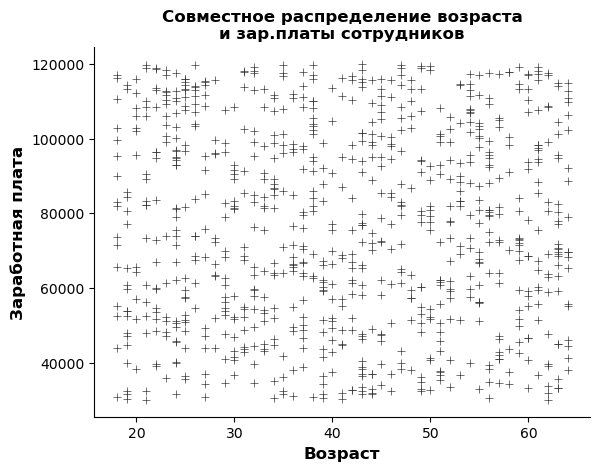

In [53]:

#график 
sns.scatterplot(data=df, 
                x='age', 
                y='salary', 
                color=".2", 
                marker="+")

#подписываем график
plt.title('Совместное распределение возраста\n\
и зар.платы сотрудников',
         fontsize=12, fontweight="bold")

#добавляем подписи по осям Х,убираем по оси У
plt.ylabel('Заработная плата',
fontsize=12, fontweight="bold")
plt.xlabel('Возраст', 
           fontsize=12, fontweight="bold")
# сетка
plt.grid(False) 
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
#выводим график
plt.show()

Ни коэффициент phi_k, равный 0.11 (где минимум 0 - взаимосвязи нет, максимум 1 - сильнейшая корреляция), ни матрица рассеяния не дали оснований заподозрить наличия зависимости от возраста и размера заработной платы.

#### Итоги раздела зависимость между возрастом и размером заработной платы

Взаимосвязи между уровнем заработной платы и возрастом в компании нет. 

Продолжим анализ.

### Периоды принятия на работу.
Найдем в каком году было принято

   - больше всего сорудников
   - меньше всего сотрудников

Добавим столбец с годом.

In [54]:
df['year'] = df['join_date'].dt.year
df.sample(n=2, random_state=2)

,first_name,last_name,age,email,salary,join_date,year
483,Victor,Rivera,54,catherine@example.com,107694.0,2020-03-11,2020
712,Yasmine,Martin,21,catherine@example.com,30019.0,2023-01-06,2023


Сгруппируем таблицу по годам.

In [55]:
print('Сводная таблица по годам')
df_pivot = (df
            .groupby(['year'])
            .agg({'first_name':'count',
                  'salary': 'median'})
            .rename(columns={'first_name': 'count'})
            .sort_values(by='count', ascending=False)
            .reset_index()
               )

# добавим столбец с % по количеству принятых сотр от общего числа
df_pivot['count_%'] = (round(df_pivot['count'] * 100
                    / df_pivot['count'].sum(), 1))
# добавим цвета таблице
(df_pivot.sort_values(by='year')
 .style.background_gradient(cmap="YlGnBu")) # (cmap='YlOrRd'))

Сводная таблица по годам


,year,count,salary,count_%
1,2020,204,73965.500000,23.900000
2,2021,201,75468.000000,23.600000
0,2022,259,75628.000000,30.400000
3,2023,188,77578.000000,22.100000


Получилась наглядная таблица, помимо основного вопроса, в какой из годов нанято больше или меньше всего сотрудников, можно сделать вывод, что медианная заработная плата среди сотрудников выше у тех, кто принят позднее всего.

Визуализируем результат по доле принятых сотрудников по годам.

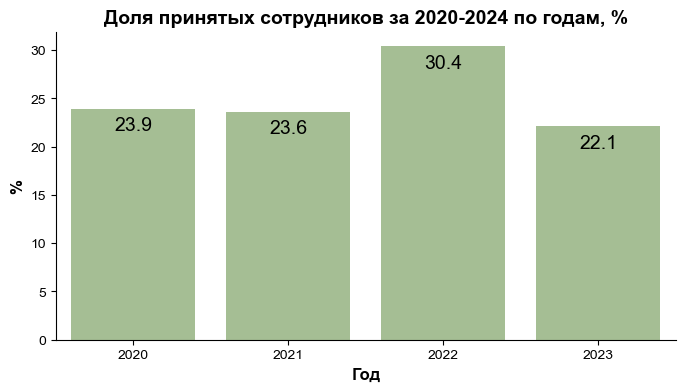

In [56]:
#добавляем визуализацию
#задаем размеры фигуры
plt.figure(figsize=(8, 4))
#дополнительно выделим цветом сильно выделяющиеся столбцы
colors = ['#9ABF80']
# задаем параметры графика и сохраним график в переменную
splot = sns.barplot(
    data=df_pivot
    .sort_values(by='count_%', ascending=False),
    y='count_%',    # указываем столбец с данными для оси X
    x='year',        # указываем столбец с данными для оси Y
    palette=colors,     # цвет столбцов - кастомизированный
    alpha=0.9           # делаем столбцы прозрачнее
                   )
#добавляем подписи к столбцам со значением   
for p in splot.patches: 
    splot.annotate(format(round(p.get_height(), 3), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   size=14, 
                   xytext=(0, -12), 
                   textcoords='offset points')
# Подписываем и отображаем график
plt.title('Доля принятых сотрудников за 2020-2024 по годам, %', 
          fontsize=14, 
          fontweight="bold")
plt.ylabel('%', fontsize=12, fontweight="bold")
plt.xlabel('Год', fontsize=12, fontweight="bold")
# сетка
plt.grid(False) 
# цвет подложки one of {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid")
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
#выводим график
plt.show()

За период с 2020 по 2023 год включительно:
 - в 2022 году сотрудников было принято больше, чем в остальные годы 30.4 % от общего числа,
 - в  2023 году принятых сотрудников меньше, чем в остальные годы 22.1%

Осталось выяснить какой категории сотрудников работает в компании больше всего

### Сотрудники по возрастным категория.
Разделим сотрудников на категории и найдем ту категорию, которой больше всего.

Группы сотрудников 4:
- 18-26 - `группа 1: 18-26`
- 27-45 - `группа 2: 27-35`
- 46-59 - `группа 3: 36-49`
- 60+ - `группа 4: 60+`

Используем для этого Функцию cut()

In [57]:
# Разбиваем на категории с помощью pd.cut
df["people_group"] = (
           pd.cut(df["age"], 
           bins=[0, 27, 46, 59, 100], 
           labels=["группа 1: 18-26", "группа 2: 27-35", 
                   "группа 3: 36-49", "группа 4:   60+"])
)
df.sample(n=5, random_state=3)

,first_name,last_name,age,email,salary,join_date,year,people_group
936,Ella,Davis,29,noah@example.com,52774.0,2022-05-19,2022,группа 2: 27-35
289,Ivy,Walker,59,frank@example.com,51810.0,2020-02-18,2020,группа 3: 36-49
560,Rosa,Jackson,25,charlie@example.com,57297.0,2022-01-05,2022,группа 1: 18-26
363,Ulysses,Rivera,47,henry@example.com,82085.0,2020-11-24,2020,группа 3: 36-49
208,Bob,Davis,63,grace@example.com,69619.0,2021-11-17,2021,группа 4: 60+


Категоризировали сотрудников по возрастам, теперь сгруппируем данные. Как и прошлый раз, добавим информацию о медианной заработной плате. Вопроса такого не стояло, но уровень зп - это всегда волнительно.

In [58]:
print('Сводная таблица по категориям возрастов сотрудникво')
df_pivot_age = (df
            .groupby(['people_group'])
            .agg({'first_name':'count',
                  'salary': 'median'})
            .rename(columns={'first_name': 'count'})
            .sort_values(by='count', ascending=False)
            .reset_index()
               )

# добавим столбец с % по кол. сотр в группе от общего числа
df_pivot_age ['count_%'] = (round(df_pivot_age ['count'] * 100
                    / df_pivot_age['count'].sum(), 1))
# добавим цвета таблице
(df_pivot_age .sort_values(by='people_group')
 .style.background_gradient(cmap="YlGnBu")) # (cmap='YlOrRd'))

Сводная таблица по категориям возрастов сотрудникво


,people_group,count,salary,count_%
2,группа 1: 18-26,186,81773.000000,21.800000
0,группа 2: 27-35,341,70950.000000,40.000000
1,группа 3: 36-49,227,79245.000000,26.600000
3,группа 4: 60+,98,71196.000000,11.500000


Интересно получается - по возрастам в принципе ожидаемо - самая многочисленная группа это группа 2, где возраст 27-35 лет - их 40% от общего числа. Второе место группа 3 - возраст с 36 по 49 лет их 26.6%, третье место самая молодая группа 1 с возрастом 18-26, их 21.8%, меньше всего людей с возрастом 60+ там 11.5% людей.

А вот по заработной плате - молодежь от 18-26 лет имеет самую высокую медианную заработную плату в этой компании - 81773.0, второе место не с очень большим отрывом у группы 3 с возрастом 36-49 лет - 79245.0, а вот у групп 2 и 3 медианная зп гораздо ниже, чем у у остальных.

Посмотрим на графике распределение сотрудников по возрастным группам.


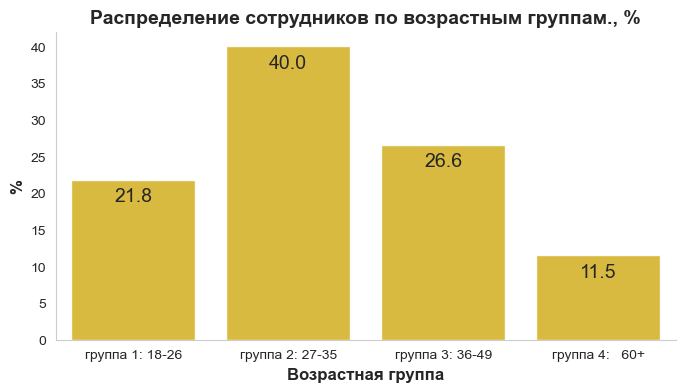

In [59]:
#добавляем визуализацию
#задаем размеры фигуры
plt.figure(figsize=(8, 4))
#дополнительно выделим цветом сильно выделяющиеся столбцы
colors = ['#f1c40f']
# задаем параметры графика и сохраним график в переменную
splot = sns.barplot(
    data=df_pivot_age
    .sort_values(by='count_%', ascending=False),
    y='count_%',    # указываем столбец с данными для оси X
    x='people_group',        # указываем столбец с данными для оси Y
    palette=colors,     # цвет столбцов - кастомизированный
    alpha=0.9           # делаем столбцы прозрачнее
                   )
#добавляем подписи к столбцам со значением   
for p in splot.patches: 
    splot.annotate(format(round(p.get_height(), 3), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   size=14, 
                   xytext=(0, -12), 
                   textcoords='offset points')
# Подписываем и отображаем график
plt.title('Распределение сотрудников по возрастным группам, %', 
          fontsize=14, 
          fontweight="bold")
plt.ylabel('%', fontsize=12, fontweight="bold")
plt.xlabel('Возрастная группа', fontsize=12, fontweight="bold")
# сетка
plt.grid(False) 
# цвет подложки one of {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid")
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
#выводим график
plt.show()

Самая многочисленная возрастная группа сотрудников 27-35 лет, их 40%. 

### Итоги раздела Анализ данных
В ходе анализа нашли ответ на следующие вопросы:
1. В компании зависимости между возрастом и размером заработной платы нет. 

2. За период с 2020 по 2023 год включительно:
 - в 2022 году сотрудников было принято больше, чем в остальные годы 30.4 % от общего числа,
 - в  2023 году принятых сотрудников меньше, чем в остальные годы 22.1%

3. Самая многочисленная возрастная группа сотрудников 27-35 лет, их 40%. 


## Общий вывод.
В ходе очистки данных удалено 148 строк, это 14,8% от исходного объема данных в 1000 строк. 

Остались 852 строк даных за 4 полных года о сотрудниках, их заработной плате и дате приема.

На оставшихся данных провели анализ данных и выявили, что

 - Зависимости между возрастом и размером заработной платы нет, при этом медианная заработная плата выше всего в возрастной группы сотрудников  18-26, а ниже всего у возрастов 27-35, она же является самой многочисленной группой 40% от общего числа.

 - Также увидели тенденцию на повышение медианной заработной платы у сотрудникеов, которых приянти на работу позднее (например в 2023 году медианная зп 77578, а в 2020 это 73965.

Можно сказать, что поставленная цель проекта, а именно, провести поверхностную аналитику данных по сотрудникам, была достигнута.

Выполнены все поставленные задачи:
 - дать оценку качеству полученных данных
 - очистить данные от аномалий и получить чистые от них данные
 - анализ очищенных данных. 

